In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


Data Importing and cleansing

In [65]:
loan =  pd.read_csv("LoansData.csv")
loan.isna().sum()
loan.drop(columns=["Employment.Length"],inplace = True)

In [66]:
loan.dropna(inplace=True)
loan.reset_index(drop = True,inplace=True)
loan.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2489 non-null   float64
 1   Amount.Funded.By.Investors      2489 non-null   float64
 2   Interest.Rate                   2489 non-null   object 
 3   Loan.Length                     2489 non-null   object 
 4   Loan.Purpose                    2489 non-null   object 
 5   Debt.To.Income.Ratio            2489 non-null   object 
 6   State                           2489 non-null   object 
 7   Home.Ownership                  2489 non-null   object 
 8   Monthly.Income                  2489 non-null   float64
 9   FICO.Range                      2489 non-null   object 
 10  Open.CREDIT.Lines               2489 non-null   float64
 11  Revolving.CREDIT.Balance        2489 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [67]:
loan["Interest.Rate"] = loan["Interest.Rate"].astype(str).apply(lambda x : x.replace("%","")).astype(float)
func = np.vectorize(lambda x : x.replace(".","_"))

rename = dict(zip(loan.columns.tolist(),func(loan.columns)))

loan.rename(columns=rename,inplace= True)
loan

Amount_Requested  Amount_Funded_By_Investors  Interest_Rate Loan_Length  \
0              20000.0                    20000.00           8.90   36 months   
1              19200.0                    19200.00          12.12   36 months   
2              35000.0                    35000.00          21.98   60 months   
3              10000.0                     9975.00           9.99   36 months   
4              12000.0                    12000.00          11.71   36 months   
...                ...                         ...            ...         ...   
2484           30000.0                    29950.00          16.77   60 months   
2485           16000.0                    16000.00          14.09   60 months   
2486           10000.0                    10000.00          13.99   36 months   
2487            6000.0                     6000.00          12.42   36 months   
2488            9000.0                     5242.75          13.79   36 months   

            Loan_Purpose Debt_To_Income_Ratio State Home_Ownership  \
0     debt_consolidation               14.90%    SC       MORTGAGE   
1     debt_consolidation               28.36%    TX       MORTGAGE   
2     debt_consolidation               23.81%    CA       MORTGAGE   
3     debt_consolidation               14.30%    KS       MORTGAGE   
4            credit_card               18.78%    NJ           RENT   
...                  ...                  ...   ...            ...   
2484  debt_consolidation               19.23%    NY       MORTGAGE   
2485    home_improvement               21.54%    MD            OWN   
2486  debt_consolidation                4.89%    PA       MORTGAGE   
2487      major_purchase               16.66%    NJ           RENT   
2488  debt_consolidation                6.76%    NY           RENT   

      Monthly_Income FICO_Range  Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
0            6541.67    735-739               14.0                   14272.0   
1            4583.33    715-719               12.0                   11140.0   
2           11500.00    690-694               14.0                   21977.0   
3            3833.33    695-699               10.0                    9346.0   
4            3195.00    695-699               11.0                   14469.0   
...              ...        ...                ...                       ...   
2484         9250.00    705-709               15.0                   45880.0   
2485         8903.25    740-744               18.0                   18898.0   
2486         2166.67    680-684                4.0                    4544.0   
2487         3500.00    675-679                8.0                    7753.0   
2488         3875.00    670-674                7.0                    7589.0   

      Inquiries_in_the_Last_6_Months  
0                                2.0  
1                                1.0  
2                                1.0  
3                                0.0  
4                                0.0  
...                              ...  
2484                             1.0  
2485                             1.0  
2486                             0.0  
2487                             0.0  
2488                             0.0  

[2489 rows x 13 columns]

In [68]:
loan["Debt_To_Income_Ratio"] = loan["Debt_To_Income_Ratio"].astype(str).apply(lambda x : x.replace("%","")).astype(float)
loan["Loan_Length"] = loan["Loan_Length"].astype(str).apply(lambda x : x.replace(" months","")).astype(float)

loan[["Debt_To_Income_Ratio","Loan_Length"]]

Debt_To_Income_Ratio  Loan_Length
0                    14.90         36.0
1                    28.36         36.0
2                    23.81         60.0
3                    14.30         36.0
4                    18.78         36.0
...                    ...          ...
2484                 19.23         60.0
2485                 21.54         60.0
2486                  4.89         36.0
2487                 16.66         36.0
2488                  6.76         36.0

[2489 rows x 2 columns]

#### BUSSINESS PROBLEM 1
#### A. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

1. Ho - Null Hypothesis change in loan amount has no affect interest rate or increase in loan amount leads to increase in interest rate
2. Ha - change in loan amount has affect (related) interest rate(less interest rate charged for more loan amount )
3. We will find the corelation between interest rate and loan amount if correleation is strong and negative then we can reject the null hypothesis

In [69]:
# loan["Interest_Rate"].corr(loan["Amount_Funded_By_Investors"])
stats.pearsonr(loan["Interest_Rate"],loan["Amount_Funded_By_Investors"])


(0.3358194064278588, 1.1396807200473959e-66)

Since the with strong p value we can say that correleation coefficient is 0.33 which is a poor correleation (95% Confident) moreover correlation is not -ve  we can not reject the null hypothesis

#### B. Loan length is directly effecting intrest rate.

1. Ho - loan length does not directly affect  interest rate
2. Ha - loan length directly affect the interest rate
3. We will find the correlation between interest rate and loan length if there is strong relation


    a. if directly means directly proportional then we can reject the null hypothesis if correleation is -ve
   
   
   
    b. if directly means that change in loan length makes change in interest then it should only be strong sign of coffecient wont't matter

In [70]:
loan["Interest_Rate"].corr(loan["Loan_Length"])
# print(stats.spearmanr(loan["Interest_Rate"],loan["Loan_Length"]))
print(stats.pearsonr(loan["Interest_Rate"],loan["Loan_Length"]))

(0.4244808110067465, 1.913234435148841e-109)


correleation coefficient is 0.42 which is a poor correleation (95% Confident) and p value is strong i.e less than 0.05 so we cannot reject the null hypothesis

#### C. Inerest rate varies for different purpose of loans

1. Ho - interest rate does not vary for different purpose of loan
2. Ha - interest vary with different purpose of loan
3. Rule setting - Confidence interval - 95% p-value=0.05
4. ANOVA F_oneway test will be performed as we have multiple variables which are independent of each other 

In [71]:
# for i in loan.Loan_Purpose.unique():
#     loan.Interest_Rate[loan.Loan_Purpose=="debt_consolidation"].plot(kind="hist")
#     plt.show()

stats.f_oneway(loan.Interest_Rate[loan.Loan_Purpose=="debt_consolidation"],loan.Interest_Rate[loan.Loan_Purpose=="credit_card"],
loan.Interest_Rate[loan.Loan_Purpose=="other"],loan.Interest_Rate[loan.Loan_Purpose=="moving"],
loan.Interest_Rate[loan.Loan_Purpose=="car"],loan.Interest_Rate[loan.Loan_Purpose=="vacation"],
loan.Interest_Rate[loan.Loan_Purpose=="home_improvement"],loan.Interest_Rate[loan.Loan_Purpose=="house"],
loan.Interest_Rate[loan.Loan_Purpose=="major_purchase"],loan.Interest_Rate[loan.Loan_Purpose=="educational"],
loan.Interest_Rate[loan.Loan_Purpose=="medical"],loan.Interest_Rate[loan.Loan_Purpose=="wedding"],
loan.Interest_Rate[loan.Loan_Purpose=="small_business"],loan.Interest_Rate[loan.Loan_Purpose=="renewable_energy"]
)


F_onewayResult(statistic=7.487175499510107, pvalue=1.1346364693350775e-14)

the p value of th ANOVA test is less than 0.05 so we can reject the null hypothesis and say interest vary with  purpose of loan

#### D. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

1. Ho - if owner ship of house change fico score does not change
2. Ha - if owner ship of house change fico score does change
3. Rule Setting - CI = 95% p-value -0.05
4. Chi squared test as the are categorical variables

In [72]:
chi = pd.crosstab(columns=loan.Home_Ownership, index = loan.FICO_Range)
stats.chi2_contingency(chi)[1]
# chi

8.424183189199365e-17

since p value is less than 0.05 th fico range changes with Home ownership

In [73]:

from statistics import mean
# x ="645-649"
loan["FICO_AVG"]=loan.FICO_Range.apply(lambda x: mean(list(map(int,x.split("-")))))
loan.groupby(by=["Home_Ownership"])["FICO_AVG"].mean()
# x.split("-").map(int,x)

Home_Ownership
MORTGAGE    713.708916
OTHER       674.000000
OWN         708.550000
RENT        702.105263
Name: FICO_AVG, dtype: float64

In [74]:
stats.ttest_ind(loan["FICO_AVG"][loan.Home_Ownership=="MORTGAGE"],loan["FICO_AVG"][loan.Home_Ownership=="OWN"])

Ttest_indResult(statistic=1.801122000574274, pvalue=0.07190806467878331)

By descriptive statistics we can say that people with mortage rate will have the highest FICO SCORE followed by the people who own the house so we can say that owning the house will improve the ficoscore but mortaging it will provide even a better score

But We performed a 2 sample Ttest to see if there is a significant difference between the FICO Score and found that there is not much difference in the FICO scores so we can say that people with mortage or who OWN the house have higher FICO Score 

#### BUSINESS PROBLEM - 2

If there is any difference in the average price quotes provided by Mary and Barry

1. Ho - no difference
2. Ha - statistically significant difference
3. CI - 95%, p-value 0.05
4. first we will analyse through descriptive statistics then we will move to ttest_rel test 

In [75]:
price  = pd.read_csv("Price_Quotes.csv")
price.set_index(["Order_Number"],inplace= True)

In [76]:
price.mean()

Barry_Price    124.333333
Mary_Price     114.750000
dtype: float64

In [77]:
stats.ttest_rel(price["Barry_Price"],price["Mary_Price"])

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

Since the p-value is less than 0.05 we can reject our null hypothesis and say that there is a statisticaly significant difference in price quote made by Barry and Mary(Hence price quote also depends on pricing expert)

#### BUSINESS PROBLEM-3

BACKGROUND: The New Life Residential Treatment Facility is a NGO that treats teenagers who
have shown signs of mental illness. It provides housing and supervision of teenagers who are
making the transition from psychiatric hospitals back into the community. Because many of
the teenagers were severely abused as children and have been involved with the juvenile
justice system, behavioral problems are common at New Life. Employee pay is low and staff
turnover (attrition) is high.
A reengineering program was instituted at New Life with the goals of lowering behavioral
problems of the kids and decreasing employee turnover rates. As a part of this effort, the
following changes were made:
 Employee shifts were shortened from 10 hours to 8 hours each day.
 Employees were motivated to become more involved in patient treatments. This
included encouraging staff to run various therapeutic treatment sessions and allowing
staff to have more say in program changes.
 The activities budget was increased.
 A facility-wide performance evaluation system was put into place that rewarded staff
participation and innovation.
 Management and staff instituted a program designed to raise expectations about
appropriate behavior from the kids. This included strict compliance with reporting of
behavioral violations, insistence on participation in therapeutic sessions, and a
lowered tolerance for even moderate behavioral infractions.
To determine the effectiveness of the reengineering effort, a data set comprised of pre- and
post-reengineering periods was compiled. The information contains two measures of
behavioral problems. A critical incident occurs when a resident goes AWOL (leaves the
premises without permission), destroys property (e.g., punching a hole in a wall or throwing
furniture through windows), is caught in possession of street drugs, or engages in assault
against other residents or staff members. A teenager is temporarily removed from the facility
when s/he is sent to jail or back to a psychiatric hospital

BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the
incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort
changed the critical incidence rate. Is there evidence that the critical incidence rate
improved?

DATA AVAILABLE: Treatment_Facility.csv
The data set contains 20 months of data; the first 13 months were prior to reengineering. The
variables in the data include:

1. Reengineer: Whether the month was before (Prior) or after (Post) reengineering

2. Employee Turnover: The percentage of employees who quit in a given
month, out of the total number of employees

3. TRFF(%): The percentage of residents who were temporarily removed from
the facility, out of the total number of residents

4. CI (%): The percentage of critical incident reports written that month, out of
the total number of residents

Reframing the data in the required format

In [78]:
rengineer = pd.read_csv("Treatment_Facility.csv")
rengineer

Month Reengineer  Employee_Turnover       VAR4        VAR5
0       1      Prior             0.0000  24.390244   42.682927
1       2      Prior             6.0606  19.354839   25.806452
2       3      Prior            12.1212  35.087719  146.198830
3       4      Prior             3.3333  18.404908  110.429448
4       5      Prior            12.9032  17.964072   23.952096
5       6      Prior             9.6774  41.176471   47.058824
6       7      Prior            11.7647  13.422819    0.000000
7       8      Prior            11.4286  31.250000   25.000000
8       9      Prior            23.0769  17.241379  132.183908
9      10      Prior            15.0000  16.574586   16.574586
10     11      Prior            10.0000   5.917160   88.757396
11     12      Prior            26.0870  21.164021   31.746032
12     13      Prior            11.1111   5.076142   10.152284
13     14       Post            26.6667   9.708738   29.126214
14     15       Post            17.9487   4.201681   21.008403
15     16       Post            12.8205  13.043478   34.782609
16     17       Post            15.7895   9.950249   19.900498
17     18       Post             0.0000   9.950249    9.950249
18     19       Post            30.7692   8.510638   25.531915
19     20       Post            26.8293   9.259259   23.148148

In [79]:
rengineer.rename(columns={"VAR4":"TRFF","VAR5":"CI"},inplace = True)

In [80]:
rengineer[["Employee_Turnover","TRFF","CI"]] = round(rengineer[["Employee_Turnover","TRFF","CI"]],1)

In [81]:
print("Prior Treatment\n",rengineer[rengineer["Reengineer"]=="Prior"].mean(),"\n\n\nPost Treatment\n",rengineer[rengineer["Reengineer"]=="Post"].mean())

# rengineer.info()

Prior Treatment
 Month                 7.000000
Employee_Turnover    11.738462
TRFF                 20.546154
CI                   53.900000
dtype: float64 


Post Treatment
 Month                17.000000
Employee_Turnover    18.685714
TRFF                  9.242857
CI                   23.342857
dtype: float64


C:\Users\jitai\AppData\Local\Temp\ipykernel_1160\1602895515.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Prior Treatment\n",rengineer[rengineer["Reengineer"]=="Prior"].mean(),"\n\n\nPost Treatment\n",rengineer[rengineer["Reengineer"]=="Post"].mean())


1. Ho - No improvment Employee Turnover or employee turnover has increased
2. Ha - Employee Turnover has reduced 
3. Rule Setting : Confidence Interval = 95%, p-value = 0.05
4. we have already descriptive analysis of the data we found out that the employee turnout has increased but we perform ttest_ind for 2 independent vartiable 

In [82]:

stats.ttest_ind(rengineer[rengineer["Reengineer"]=="Post"]["Employee_Turnover"],rengineer[rengineer["Reengineer"]=="Prior"]["Employee_Turnover"])

Ttest_indResult(statistic=1.7673422372734093, pvalue=0.09412001154023555)

since p value is > 0.05 so we can say that the trunout has increased but after the changes but it is not statistically significant but either way we can not reject the null hypothesis

1. Ho - No improvment TRFF or TRFF has increased
2. Ha - TRFF has reduced 
3. Rule Setting : Confidence Interval = 95%, p-value = 0.05
4. we have already descriptive analysis of the data we found out that theTRFF has increased but we perform ttest_ind for 2 independent vartiable

In [83]:
stats.ttest_ind(rengineer[rengineer["Reengineer"]=="Post"]["TRFF"],rengineer[rengineer["Reengineer"]=="Prior"]["TRFF"])

Ttest_indResult(statistic=-2.7820417260067645, pvalue=0.012300739094095193)

Since p-Value id < 0.05 we can say that their is significant reduction in TRFF rate thus we can reject the null hypothesis and say that the measures taken were sucessull in reducing  TRFF rate

In [84]:
stats.ttest_1samp(rengineer[rengineer["Reengineer"]=="Post"]["CI"],rengineer[rengineer["Reengineer"]=="Prior"]["CI"].mean())

Ttest_1sampResult(statistic=-10.372664369165367, pvalue=4.699529436584456e-05)

Since p-Value id < 0.05 we can say that their is significant reduction in CI rate thus we can reject the null hypothesis and say that the measures taken were sucessull in reducing  CI rate

##### We can conclude that the the mesures taken were good enough to reduce the Critical Incidents and TRFF rates but it was not successfull in reducing the Employee turnover

In [85]:
priority = pd.read_csv("Priority_Assessment.csv")
priority

Days Priority
0     3.3     High
1     7.9   Medium
2     0.3     High
3     0.7   Medium
4     8.6   Medium
..    ...      ...
637   2.5      Low
638   0.3     High
639   0.3   Medium
640   1.3   Medium
641   0.5     High

[642 rows x 2 columns]

#### BUSINESS PROBLEM-4

BACKGROUND: Software development projects typically follow six basic phases: Requirements,
design, implementation (and integration), testing (validation), deployment (installation) and
maintenance. First, general requirements are gathered, and the scope of the functionality is
defined. Then, alternative scenarios for the required functionality are developed and
evaluated. Implementation, usually 50% or more of the development time, is the phase in
which the design is translated into programs and integrated with other parts of the software –
this is when software engineers actually develop the code. During the final phases, programs
are tested, software is put into use, and faults or performance issues are addressed.
ApDudes, a developer of applications for tablet computers, was having difficulty meeting
project deadlines; only 10% of their projects had been completed within budget and on time
last year and that was starting to hurt business. The group’s project manager was tasked with
studying problems within the implementation phase. He found that software engineers were
having difficulty prioritizing their work, and that they often became overwhelmed by the
magnitude of the projects.
As a result, two changes were made. Each project was broken down into smaller, distinct
tasks, or jobs, and each job was assigned a priority. The project manager believes that this
classification and prioritization system would speed the completion of high priority jobs, and
thus lower overall project completion time


BUSINESS PROBLEM: We will focus on the prioritization system. If the system is working, then
high priority jobs, on average, should be completed more quickly than medium priority jobs,
and medium priority jobs should be completed more quickly than low priority jobs. Use the
data provided to determine whether this is, in fact, occurring

In [86]:
high = priority[priority.Priority == "High"]["Days"]
low = priority[priority.Priority == "Low"]["Days"]
medium = priority[priority.Priority == "Medium"]["Days"]

In [87]:
high.mean()

3.023619631901845

In [88]:
low.mean()

4.228358208955225

In [89]:
medium.mean()

2.5000000000000004

###### Hypothesis Testing
1. Ho - The measures did not made the engineers work according to the priority
2. Ha - Engineers started to work according to the priority 
3. Rule Setting:- CI = 95% , p-value = 0.05
4. we will perform  ttest_ind test on all the different data :-

ttest_ind of high and medium priority 

ttest_ind of high and low priority

ttest_ind of medium and low priority

to reject the null hypothesis the high priority time should be than medium priority
to reject the null hypothesis the high priority time should be than low priority
to reject the null hypothesis the medium priority time should be than low priority
 

In [90]:
stats.ttest_ind(high,medium)
# high

Ttest_indResult(statistic=0.925239411198133, pvalue=0.3552308818116795)

since the p value is 0.23 we can not say that the difference between  the time taken by engineers to solve high priority and medium priority is not statistically significant 

In [91]:
stats.ttest_ind(high,low)

Ttest_indResult(statistic=-1.1899899182172096, pvalue=0.2347723945662153)


since the p value is 0.23 we can not say that the difference between  the time taken by engineers to solve high priority and low priority is not statistically significant 

In [92]:
stats.ttest_ind(medium,low)

Ttest_indResult(statistic=-2.3690822147998514, pvalue=0.01843700901540487)

since the p value is 0.01 which is < 0.05 we can  that the difference between  the time taken by engineers to solve medium priority and low priority is statistically significant 

Since there is no statisticaly significant difference between high and medium and high and low priority work we can not reject null hypothesis

BUSINESS PROBLEM-5
BackGround: Film on the Rocks is a summer movie series held at the world-renowned Red
Rocks Amphitheatre, which is situated on a hillside of the Rocky Mountains in Morrison,
Colorado fifteen miles west of Denver. The film series features classic films, and pre-show
entertainment including bands and comedians. Among the features that have made Red Rocks
an internationally-famous concert stage are sweeping views of Denver, outstanding acoustics,
and cool, dry Colorado summers.

The series is jointly promoted by the Denver Film Society (DFS) and the City and County of
Denver’s Division of Theatres and Arenas (DT&A). It is marketed through various outlets
including newspaper, radio, and the Red Rocks and Denver Film Society websites. Film on the
Rocks patrons also benefit from corporate sponsorship. In return for on-site posters and
banners at Red Rocks, and recognition in pre- show marketing materials, corporations donate
funds that keep ticket prices low.

Although the Red Rocks Amphitheatre provides a cinematic experience unlike any other venue,
there are tradeoffs. Red Rocks is a farther commute for most people than the local movie
theater or movie rental store. Given the uphill walk to the amphitheatre from the parking lot,
getting there can be challenging. And, as an outdoor venue, the viewing experience is
dependent on the weather.

Patron satisfaction with Red Rocks as the venue for the film series is critical to its success. But,
the series promoters would also like to increase attendance at the film series, and are unsure
how to do this. Promoters recognize that they need a better understanding of the customer
base, and of the current level of satisfaction. Knowing the demographics of those who attend
the film series will help attract and expand corporate sponsorship. In addition, knowing which
media outlets are most effective will provideinformation about how best to target future
marketing campaigns.

To this end, the promoters conducted surveys during a recent Film on the Rocks season.
Questionnaires were handed out at the entrance. Volunteers walked through the crowd to
remind people about the free soft drink given to those who returned the survey.

BUSINESS PROBLEM: Use the survey results to address the following questions

 What is the overall level of customer satisfaction?

 What factors are linked to satisfaction?

 What is the demographic profile of Film on the Rocks patrons?

 In what media outlet(s) should the film series be advertised?

DATA AVAILABLE: Data provided by the Denver Film Society

 Films.csv

The data set contains 330 surveys collected during three Film on the Rocks movies:
Ferris Bueller’s Day Off, Old School, and Willy Wonka and the Chocolate Factory.
The variables are:


Gender The patron’s gender: 1 = male; 2 = female

Marital Status The patron’s marital status: 1 = married; 2 = single

Age The patron’s age in years: 1= 1-12; 2 = 13-30; 3 = 31-60; 4 = 60+

Income The patron’s annual household income: 1 = Less than $50,000; 2 = $50-
$100,000; 3 = $100,000+

Hear About The patron’s response to this question: “How did you hear about Film
on the Rocks?” Respondents could check any of the following that applied: 1 = television; 2 =
newspaper; 3 = radio; 4 = website; 5 = word of mouth

The survey also contained four Likert-scaled questions about satisfaction; each of the following
questions is coded: 1 = Excellent; 2 = Good; 3 = Average/Fair; 4 = Poor; 5 = Very Poor.

Signage “How was the signage directing you to Red Rocks?”

Parking “How was the venue’s parking?”

Clean “How was the cleanliness of the venue?”

Overall “How was your overall customer service experience?”

In [93]:
film = pd.read_csv("Films.csv")

In [94]:
film.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [95]:
film.Sinage = film.Sinage.fillna(film.Sinage.mean()).astype("uint8")
film.Parking = film.Parking.fillna(film.Parking.mean()).astype("uint8")
film.Clean = film.Clean.fillna(film.Clean.mean()).astype("uint8")
film.Overall = film.Overall.fillna(film.Overall.mean()).astype("uint8")
film.Income = film.Income.fillna(film.Income.mean()).astype("uint8")
film.Age = film.Age.fillna(film.Age.mean()).astype("uint8")

In [96]:
film.Gender.unique()
film.Gender = film.Gender.apply(lambda x: 1 if x == "Male" else 2 if x== "Female" else x )

In [97]:
film.Marital_Status.unique()
film.Marital_Status = film.Marital_Status.apply(lambda x: 2 if x == "Single" or x == "Slngle" else 1 if x== "Married" else x )

#### What is the overall level of customer satisfaction?

In [98]:
film.groupby(by=["Overall"])._rowstate_.count(),film.Overall.mean()

(Overall
 1    153
 2    160
 3     12
 4      1
 5      4
 Name: _rowstate_, dtype: int64,
 1.6151515151515152)

Here we can se that Excelent and Good have most rating and the mean of the data is 1.675 so we can say that the rating is good

In [99]:
from pandas_profiling import ProfileReport


In [100]:
# film.dropna(subset=["Hear_About"],inplace=True)
# film.Hear_About = film.Hear_About.astype(str)
# film.Hear_About = film.Hear_About.apply(lambda x : mean(map(int,x.split(","))) if x.find(",") else map(int,x)).astype(int)
film["Hear_About"].fillna(value = 0,inplace = True)

In [101]:
film.Gender = film.Gender.astype("uint8")


In [102]:
film.dropna(subset=["Marital_Status"],inplace=True)
film.Marital_Status = film.Marital_Status.astype("uint8")
film.dtypes

_rowstate_         int64
Movie             object
Gender             uint8
Marital_Status     uint8
Sinage             uint8
Parking            uint8
Clean              uint8
Overall            uint8
Age                uint8
Income             uint8
Hear_About        object
dtype: object

#### What factors are linked to satisfaction?

In [103]:
film.profile_report(vars={"num": {"low_categorical_threshold": 0}})


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We made a profile report to easily find out the that Overall Satisfaction rating is related to Sinage,Parking and Clean

now we need to find out the level of correleation 

if co releation coefficient is > 0.5 then we will consider it as high co releation

In [104]:
stats.pearsonr(film.Clean,film.Overall)

(0.3517686951084268, 5.481505992990621e-11)

In [105]:
stats.pearsonr(film.Sinage,film.Overall)

(0.38637577472411067, 4.0313213658544e-13)

In [106]:
stats.pearsonr(film.Parking,film.Overall)

(0.5178669610211208, 6.67631296482289e-24)

Here we found out that there is positve correleation with all the 3 variables but Overall Satisfaction has HIGH corelation with only PARKING so we can say that Parking High and positve effect on Overall rating while Sinage and Clean have medium and positve effect

#### What is the demographic profile of Film on the Rocks patrons?

In [107]:
cs = pd.crosstab(index = film["Movie"],columns=film["Gender"])
cs

Gender                    1    2
Movie                           
Ferris Buellers Day Off  51   86
Old School               12   19
Willy Wonka              52  108

In [108]:
cs.mean()

Gender
1    38.333333
2    71.000000
dtype: float64

In [109]:
stats.chi2_contingency(cs)[1]

0.6299364020243625

There not Statistically significant difference in the demographic profile of Film on the Rocks patrons

By Descripitive Statistical Analysis we can say that females watch movies more than males 

#### In what media outlet(s) should the film series be advertised?

<AxesSubplot:xlabel='Hear_About'>

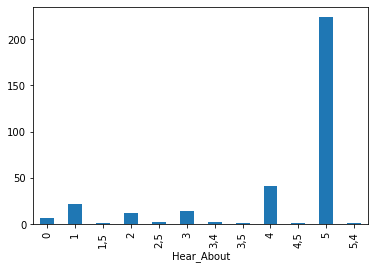

In [125]:
%matplotlib inline
# plt.hist()
# plt.show()
film.groupby(by=["Hear_About"]).count()["_rowstate_"].plot(kind="bar")

As we can clearly see that Media type 5 brings most of the people to The Rocks we can say that the rocks should focus on targetting people using hearsay( Word of mouth )